In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 영화 관객 수 예측해보기

#### 링크 : https://dacon.io/competitions/open/235536/codeshare/1536?page=1&dtype=recent

In [2]:
df_train = pd.read_csv("C:/Users/choij/Desktop/datasets/영화 관객수/movies_train.csv")
df_train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
df_test = pd.read_csv("C:/Users/choij/Desktop/datasets/영화 관객수/movies_test.csv")
df_test.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [4]:
submission = pd.read_csv("C:/Users/choij/Desktop/datasets/영화 관객수/submission.csv")
submission.head(5)

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


# EDA

### 다양한 방법으로 데이터 분석해보기

In [5]:
print(df_train.shape)
print(df_test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
pd.options.display.float_format = '{:.1f}'.format

In [8]:
df_train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


#### 그룹 절 이용해서 장르, 관객 살펴보기

In [9]:
df_train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [10]:
df_train.groupby('genre').mean().sort_values('box_off_num')

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
genre,,,,,,
뮤지컬,107.0,NaN,0.0,2.2,2.8,6627.0
다큐멘터리,88.1,204749.2,0.4,17.8,3.3,67172.3
서스펜스,112.0,534232.5,1.0,111.0,3.0,82611.0
애니메이션,82.6,53235.0,0.0,44.6,5.7,181926.7
멜로/로맨스,96.6,1200880.8,1.0,135.8,3.4,425968.0
미스터리,102.6,902529.8,1.2,117.4,2.9,527548.2
공포,100.2,1079738.8,1.1,176.4,3.9,590832.5
드라마,104.7,845724.9,0.8,164.5,3.6,625689.8
코미디,105.3,1618498.0,1.1,209.1,4.7,1193914.0


#### 상관관계 살펴보기

In [11]:
df_train.corr() # 이 결과 스태프 수와 상관관계가 있음을 알 수 있음
# 그러나 이는 인과관계를 뜻하지는 않는다. 스태프수가 많을 수록 제작비가 많이 들어가 좋은 작품이 나온 것일 수
# 있기 때문이다.

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.0,0.3,0.3,0.6,0.1,0.4
dir_prev_bfnum,0.3,1.0,0.1,0.3,0.1,0.3
dir_prev_num,0.3,0.1,1.0,0.5,0.0,0.3
num_staff,0.6,0.3,0.5,1.0,0.1,0.5
num_actor,0.1,0.1,0.0,0.1,1.0,0.1
box_off_num,0.4,0.3,0.3,0.5,0.1,1.0


<AxesSubplot:>

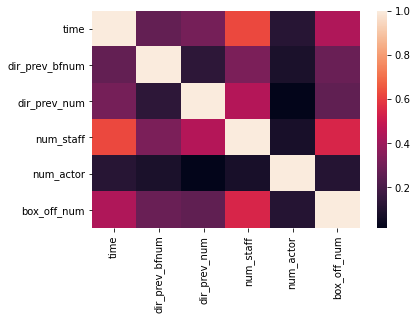

In [12]:
sns.heatmap(df_train.corr())  #시각적으로 살펴보기

# 데이터 전처리

In [13]:
df_train.isnull().sum() # 절반 가까이의 감독이 첫작품이다.>> 0값으로 채워준다.

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [14]:
df_train.fillna(0, inplace = True)

In [15]:
df_train.isnull().sum() # 결측치가 다 사라졌다.

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [16]:
df_test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [17]:
df_test.fillna(0, inplace = True)
df_test[df_test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

# 변수 선택 및 모델 구축

In [18]:
!pip install lightgbm

You should consider upgrading via the 'c:\users\choij\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
import lightgbm as lgb

In [20]:
model = lgb.LGBMRegressor(random_state = 777, n_estimatiors = 1000)

features = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
target = ['box_off_num']

In [21]:
x_train, x_test, y_train = df_train[features], df_test[features], df_train[target]

# 모델학습 및 검증
### Model Tuning & Evaluation

#### a. lightGBM(base model)
#### b. k-fold lightGBM(k-fold model)
#### feature engineering (fe)
#### grid search (hyperparameter tuning)

## LightGBM
#### 부스팅 모델
#### 기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습 이어나감
#### 타 부스팅 모델에 비해 속도가 빠름

In [22]:
model.fit(x_train, y_train)

[LightGBM] [Warning] Unknown parameter: n_estimatiors


LGBMRegressor(n_estimatiors=1000, random_state=777)

In [23]:
singleLGBM = submission.copy()

In [24]:
singleLGBM['box_off_num'] = model.predict(x_test)

In [25]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,3760144.1
1,아빠가 여자를 좋아해,757998.8
2,하모니,-10917.0
3,의형제,1490854.1
4,평행 이론,845800.0


In [26]:
singleLGBM.to_csv('singleLGBM.csv', index = False) #csv로 변환

## k-fold 교차검증(k-fold cross validation)
### 과대적합 방지
### 모델 간 일반적인 성능 비교
### validation set, development set

In [27]:
from sklearn.model_selection import KFold

In [28]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

for train_idx, val_idx in k_fold.split(x_train):
    print(len(train_idx), len(val_idx))
    break

480 120


In [29]:
x_train.iloc[[1,2,3,4]] # 밑 iloc 슬라이싱 대한 예시 
                        # kfold 로 나누면 리스트로 index를 받음

,time,dir_prev_num,num_staff,num_actor
1,130,2,387,3
2,123,4,343,4
3,101,2,20,6
4,108,1,251,2


In [30]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

models = []

for train_idx, val_idx in k_fold.split(x_train):
    x_t = x_train.iloc[train_idx] # iloc : index 로 슬라이싱 가능
    y_t = y_train.iloc[train_idx]
    x_val = x_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

[100]	valid_0's l2: 2.70572e+12
[100]	valid_0's l2: 3.90847e+12
[100]	valid_0's l2: 3.50344e+12


C:\Users\choij\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\choij\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 1.45977e+12
[100]	valid_0's l2: 1.77214e+12


In [31]:
models

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [32]:
preds = []
for model in models:
    preds.append(model.predict(x_test))
len(preds)

5

In [33]:
kfoldLightGBM = submission.copy()

In [34]:
import numpy as np

In [35]:
kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0)
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3367422.1
1,아빠가 여자를 좋아해,961138.9
2,하모니,1097929.7
3,의형제,2097270.8
4,평행 이론,781476.3


In [36]:
kfoldLightGBM.to_csv('kfoldLightGBM', index = False)

## feature engineering

In [37]:
print(features)
print(df_train.columns)
print(df_train.genre)

['time', 'dir_prev_num', 'num_staff', 'num_actor']
Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')
0       액션
1      느와르
2       액션
3      코미디
4      코미디
      ... 
595    드라마
596    드라마
597     공포
598    느와르
599     액션
Name: genre, Length: 600, dtype: object


In [38]:
from sklearn import preprocessing

In [39]:
le = preprocessing.LabelEncoder()
df_train['genre'] = le.fit_transform(df_train['genre'])
df_test['genre'] = le.fit_transform(df_test['genre'])

In [40]:
df_train['genre'] #인코딩해주기

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int32

In [41]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre']

x_train, x_test, y_train= df_train[features], df_test[features], df_train[target]

In [42]:
model = lgb.LGBMRegressor(random_state = 777, n_estimatiors = 1000)

models = []

for train_idx, val_idx in k_fold.split(x_train):
    x_t = x_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = x_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

[LightGBM] [Warning] Unknown parameter: n_estimatiors
[100]	valid_0's l2: 2.62067e+12
[100]	valid_0's l2: 4.39227e+12
[100]	valid_0's l2: 3.29841e+12


C:\Users\choij\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\choij\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 1.56499e+12
[100]	valid_0's l2: 1.60118e+12


In [43]:
x_test.head()

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre
0,125,2,304,3,300529.0,2
1,113,4,275,3,342700.2,5
2,115,3,419,7,4206610.7,4
3,116,2,408,2,691342.0,10
4,110,1,380,1,31738.0,1


In [44]:
preds = []
for model in models:
    preds.append(model.predict(x_test))
len(preds)

5

In [45]:
feLightGBM = submission.copy()

feLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [46]:
feLightGBM.to_csv('feLightGBM.csv', index = False)